#  Creating, running and testing the embeddings of a Word2Vec Model

In [1]:
import os
import io
import re
import string
import tqdm
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import nltk
from nltk.tokenize import word_tokenize
from datasets import load_dataset
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
!pip install gensim
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.callbacks import CallbackAny2Vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 100.3 MB/s eta 0:00:00


In [4]:
dataset = load_dataset("wikitext", "wikitext-103-v1")

with open("wikitext_train.txt", "w", encoding="utf-8") as f:
    for line in dataset["train"]["text"]:
        if line.strip():
            f.write(line + "\n")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

wikitext-103-v1/test-00000-of-00001.parq(…):   0%|          | 0.00/722k [00:00<?, ?B/s]

wikitext-103-v1/train-00000-of-00002.par(…):   0%|          | 0.00/156M [00:00<?, ?B/s]

wikitext-103-v1/train-00001-of-00002.par(…):   0%|          | 0.00/156M [00:00<?, ?B/s]

wikitext-103-v1/validation-00000-of-0000(…):   0%|          | 0.00/655k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
sentences = []
for line in dataset["train"]["text"]:
    if line.strip():
        tokens = word_tokenize(line.lower())
        sentences.append(tokens)


In [ ]:
## Helper class to save embeddings

In [7]:
class SaveEmbeddingsPerEpoch(CallbackAny2Vec):
    def __init__(self, save_path):
        self.epoch = 0
        self.save_path = save_path

    def on_epoch_end(self, model):
        filename = self.save_path + "/wiki103_epoch" + str(self.epoch) + ".kv"
        model.wv.save(filename)
        print("Epoch", self.epoch, "->", filename)
        self.epoch += 1


In [ ]:
## Making a folder and extracting the model's embeddings and checkpoints

In [8]:
os.makedirs("embeddings_per_epoch", exist_ok=True)

save_callback = SaveEmbeddingsPerEpoch(save_path="embeddings_per_epoch")

model = Word2Vec(
    sentences,
    vector_size=300, #default is 100, might be too small for wikitext103
    window=5,
    min_count=5,
    workers=4,
    sg=1,
    epochs=11,
    compute_loss=True,
    callbacks=[save_callback]
)


Epoch 0 -> embeddings_per_epoch/wiki103_epoch0.kv
Epoch 1 -> embeddings_per_epoch/wiki103_epoch1.kv
Epoch 2 -> embeddings_per_epoch/wiki103_epoch2.kv
Epoch 3 -> embeddings_per_epoch/wiki103_epoch3.kv
Epoch 4 -> embeddings_per_epoch/wiki103_epoch4.kv
Epoch 5 -> embeddings_per_epoch/wiki103_epoch5.kv
Epoch 6 -> embeddings_per_epoch/wiki103_epoch6.kv
Epoch 7 -> embeddings_per_epoch/wiki103_epoch7.kv
Epoch 8 -> embeddings_per_epoch/wiki103_epoch8.kv
Epoch 9 -> embeddings_per_epoch/wiki103_epoch9.kv
Epoch 10 -> embeddings_per_epoch/wiki103_epoch10.kv


In [9]:
print("Hello world") # to make sure the runtime isnt interrupted, somehow works

Hello world


In [10]:
!cp -r /content/embeddings_per_epoch /content/drive/MyDrive/ # make a copy in google drive for later retrieval to avoid running model over again

In [11]:
mock_dataset = { 'target_words': [ { 'frequency_class': 'frequent',
                      'num_senses': 75,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'glen',
                                        'cafe',
                                        'stretched',
                                        'sur',
                                        'specimen',
                                        'god',
                                        'wrest',
                                        'fright',
                                        'dean',
                                        'cock'],
                      'similar_words': [ 'reveal',
                                         'decrease',
                                         'part',
                                         'out',
                                         'escape',
                                         'weaken',
                                         'delay',
                                         'hurt',
                                         'bog',
                                         'dash'],
                      'word': 'break'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 70,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'comedian',
                                        'slav',
                                        'facing',
                                        'unusually',
                                        'sent',
                                        'gibson',
                                        'posted',
                                        'suburb',
                                        'accidentally',
                                        'participation'],
                      'similar_words': [ 'stroke',
                                         'hob',
                                         'sever',
                                         'bore',
                                         'dock',
                                         'shank',
                                         'make',
                                         'tap',
                                         'create',
                                         'rip'],
                      'word': 'cut'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 52,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'openly',
                                        'concrete',
                                        'suit',
                                        'protestant',
                                        'hiv',
                                        'annoy',
                                        'approved',
                                        'tactical',
                                        'scoring',
                                        'leeds'],
                      'similar_words': [ 'whale',
                                         'try',
                                         'waste',
                                         'roll',
                                         'block',
                                         'double',
                                         'return',
                                         'operate',
                                         'show',
                                         'action'],
                      'word': 'running'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 52,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'lasting',
                                        'frequent',
                                        'gates',
                                        'goddess',
                                        'internal',
                                        'ten',
                                        'ray',
                                        'namely',
                                        'pose',
                                        'turnpike'],
                      'similar_words': [ 'assist',
                                         'hit',
                                         'bowl',
                                         'declare',
                                         'use',
                                         'activity',
                                         'go',
                                         'follow',
                                         'face',
                                         'bring'],
                      'word': 'play'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 51,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'received',
                                        'younger',
                                        'call',
                                        'organisation',
                                        'boycott',
                                        'advisory',
                                        'kin',
                                        'erupt',
                                        'temporary',
                                        'worth'],
                      'similar_words': [ 'write',
                                         'secure',
                                         'score',
                                         'work',
                                         'name',
                                         'pay',
                                         'mold',
                                         'incorporate',
                                         'cause',
                                         'piece'],
                      'word': 'make'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 50,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'deter',
                                        'width',
                                        'natural',
                                        'tactics',
                                        'auxiliary',
                                        'medic',
                                        'educated',
                                        'pepper',
                                        'smooth',
                                        'chief'],
                      'similar_words': [ 'superior',
                                         'raise',
                                         'effective',
                                         'good',
                                         'surpass',
                                         'improve',
                                         'reform',
                                         'relieve',
                                         'turn',
                                         'alter'],
                      'word': 'better'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 47,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'grandfather',
                                        'space',
                                        'presentation',
                                        'recognition',
                                        'paid',
                                        'casting',
                                        'initiative',
                                        'likely',
                                        'clinical',
                                        'seb'],
                      'similar_words': [ 'moon',
                                         'easy',
                                         'insight',
                                         'halo',
                                         'look',
                                         'match',
                                         'shaft',
                                         'lighting',
                                         'glory',
                                         'short'],
                      'word': 'light'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 46,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'complete',
                                        'theology',
                                        'atp',
                                        'apr',
                                        'typically',
                                        'wagner',
                                        'figure',
                                        'studying',
                                        'hill',
                                        'addition'],
                      'similar_words': [ 'descent',
                                         'change',
                                         'yield',
                                         'exit',
                                         'autumn',
                                         'flag',
                                         'occur',
                                         'come',
                                         'night',
                                         'get'],
                      'word': 'falls'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 45,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'feud',
                                        'affecting',
                                        'lind',
                                        'unified',
                                        'crew',
                                        'subsequent',
                                        'material',
                                        'button',
                                        'enterprise',
                                        'fully'],
                      'similar_words': [ 'clean',
                                         'create',
                                         'hop',
                                         'strip',
                                         'withdraw',
                                         'earn',
                                         'free',
                                         'sell',
                                         'settle',
                                         'clearly'],
                      'word': 'clear'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 36,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'copyright',
                                        'isn',
                                        'rivalry',
                                        'relieve',
                                        'say',
                                        'simply',
                                        'label',
                                        'definitely',
                                        'crisis',
                                        'missouri'],
                      'similar_words': [ 'capable',
                                         'breach',
                                         'display',
                                         'gap',
                                         'exterior',
                                         'exposed',
                                         'afford',
                                         'give',
                                         'grass',
                                         'jimmy'],
                      'word': 'open'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 8,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'theatre',
                                        'nato',
                                        'investigate',
                                        'packed',
                                        'billion',
                                        'agricultural',
                                        'nervous',
                                        'sad',
                                        'ion',
                                        'aggregate'],
                      'similar_words': [ 'help',
                                         'travel',
                                         'accommodate',
                                         'staff',
                                         'fill',
                                         'serve',
                                         'treat',
                                         'handle',
                                         'apply',
                                         'cater'],
                      'word': 'ply'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 7,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'clothes',
                                        'ranking',
                                        'airing',
                                        'inclusion',
                                        'follow',
                                        'load',
                                        'supply',
                                        'lineup',
                                        'teaching',
                                        'wanting'],
                      'similar_words': [ 'invent',
                                         'piece',
                                         'fix',
                                         'restore',
                                         'butterfly',
                                         'romance',
                                         'manufacture',
                                         'doctor',
                                         'backup',
                                         'patch'],
                      'word': 'vamp'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 6,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'developed',
                                        'precise',
                                        'attention',
                                        'destroy',
                                        'repair',
                                        'critically',
                                        'surprised',
                                        'empire',
                                        'minor',
                                        'peninsula'],
                      'similar_words': [ 'edge',
                                         'slope',
                                         'side',
                                         'bank',
                                         'talking',
                                         'pitch',
                                         'talk',
                                         'move',
                                         'cock',
                                         'slant'],
                      'word': 'cant'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 9,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'hub',
                                        'path',
                                        'increasing',
                                        'respect',
                                        'businessman',
                                        'bill',
                                        'goal',
                                        'mam',
                                        'prop',
                                        'atp'],
                      'similar_words': [ 'last',
                                         'break',
                                         'bust',
                                         'tucker',
                                         'hat',
                                         'dress',
                                         'exhaust',
                                         'wear',
                                         'assume',
                                         'decay'],
                      'word': 'weares'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 4,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'later',
                                        'damages',
                                        'amino',
                                        'exit',
                                        'pursuing',
                                        'oval',
                                        'wrest',
                                        'narrowly',
                                        'operational',
                                        'wrestling'],
                      'similar_words': [ 'position',
                                         'fix',
                                         'ready',
                                         'place',
                                         'pose',
                                         'bone',
                                         'drum',
                                         'lay',
                                         'put',
                                         'prepare'],
                      'word': 'crams'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 5,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'destruction',
                                        'pollution',
                                        'putting',
                                        'retail',
                                        'notable',
                                        'mainstream',
                                        'qualification',
                                        'regional',
                                        'twin',
                                        'reception'],
                      'similar_words': [ 'captive',
                                         'con',
                                         'argument',
                                         'prisoner',
                                         'learn',
                                         'sting',
                                         'rig',
                                         'short',
                                         'study',
                                         'rook'],
                      'word': 'cons'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 4,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'forward',
                                        'heard',
                                        'news',
                                        'inning',
                                        'house',
                                        'pow',
                                        'pale',
                                        'wonderful',
                                        'radiation',
                                        'broadway'],
                      'similar_words': [ 'vamp',
                                         'reconstruction',
                                         'point',
                                         'restoration',
                                         'restore',
                                         'fix',
                                         'improvement',
                                         'piece',
                                         'maintenance',
                                         'sole'],
                      'word': 'mend'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 3,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'short',
                                        'satisfied',
                                        'elder',
                                        'scenario',
                                        'energy',
                                        'rapid',
                                        'birth',
                                        'viewer',
                                        'membership',
                                        'hull'],
                      'similar_words': [ 'jazz',
                                         'play',
                                         'repeat',
                                         'riff',
                                         'tongue',
                                         'channel',
                                         'rag',
                                         'speak',
                                         'talk',
                                         'replay'],
                      'word': 'spiel'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 12,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'dozens',
                                        'dynamics',
                                        'statute',
                                        'baron',
                                        'later',
                                        'music',
                                        'check',
                                        'mating',
                                        'distinctive',
                                        'arrow'],
                      'similar_words': [ 'rub',
                                         'connect',
                                         'interference',
                                         'stop',
                                         'connection',
                                         'period',
                                         'catch',
                                         'halt',
                                         'walk',
                                         'stay'],
                      'word': 'hitch'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 5,
                      'polysemy_class': 'polysemous',
                      'random_words': [ 'saturday',
                                        'america',
                                        'reel',
                                        'same',
                                        'express',
                                        'baker',
                                        'picture',
                                        'fit',
                                        'ranking',
                                        'panzer'],
                      'similar_words': [ 'section',
                                         'country',
                                         'hub',
                                         'part',
                                         'region',
                                         'heart',
                                         'eye',
                                         'area',
                                         'place',
                                         'lay'],
                      'word': 'middles'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'moth',
                                        'arcade',
                                        'neutral',
                                        'striker',
                                        'holy',
                                        'participation',
                                        'anonymous',
                                        'plaza',
                                        'soviet',
                                        'corruption'],
                      'similar_words': [ 'singles',
                                         'doubles',
                                         'sport',
                                         'duo',
                                         'ball',
                                         'net',
                                         'court',
                                         'serve',
                                         'hit',
                                         'smash'],
                      'word': 'tennis'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'seriously',
                                        'role',
                                        'howard',
                                        'rarely',
                                        'withdrawal',
                                        'remove',
                                        'manufacture',
                                        'lebanon',
                                        'learn',
                                        'miss'],
                      'similar_words': [ 'assess',
                                         'recommend',
                                         'value',
                                         'laud',
                                         'measure',
                                         'proclaim',
                                         'promote',
                                         'praise',
                                         'push',
                                         'worship'],
                      'word': 'praised'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'engine',
                                        'cater',
                                        'failure',
                                        'resistance',
                                        'sought',
                                        'hands',
                                        'hindi',
                                        'fun',
                                        'graduation',
                                        'rap'],
                      'similar_words': [ 'slam',
                                         'sweep',
                                         'success',
                                         'conclusion',
                                         'win',
                                         'fall',
                                         'finish',
                                         'independence',
                                         'pin',
                                         'ending'],
                      'word': 'victory'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'minutes',
                                        'declare',
                                        'armenia',
                                        'prep',
                                        'liner',
                                        'revenge',
                                        'dry',
                                        'milton',
                                        'player',
                                        'august'],
                      'similar_words': [ 'hunt',
                                         'lodge',
                                         'society',
                                         'association',
                                         'order',
                                         'club',
                                         'chapter',
                                         'group',
                                         'union',
                                         'members'],
                      'word': 'guild'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 2,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'govern',
                                        'aggress',
                                        'problem',
                                        'dominant',
                                        'highly',
                                        'tai',
                                        'bog',
                                        'winning',
                                        'relatively',
                                        'glob'],
                      'similar_words': [ 'small',
                                         'tiny',
                                         'size',
                                         'scale',
                                         'magnitude',
                                         'compact',
                                         'micro',
                                         'part',
                                         'feature',
                                         'component'],
                      'word': 'mini'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'hamburg',
                                        'bedroom',
                                        'wound',
                                        'design',
                                        'burg',
                                        'gall',
                                        'advance',
                                        'cup',
                                        'insect',
                                        'direction'],
                      'similar_words': [ 'gain',
                                         'gross',
                                         'clear',
                                         'earn',
                                         'make',
                                         'realize',
                                         'profit',
                                         'revenue',
                                         'sales',
                                         'income'],
                      'word': 'grossing'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'heights',
                                        'decisive',
                                        'marching',
                                        'livestock',
                                        'rout',
                                        'founding',
                                        'western',
                                        'bind',
                                        'dreadnought',
                                        'cab'],
                      'similar_words': [ 'expressway',
                                         'bypass',
                                         'freeway',
                                         'route',
                                         'interstate',
                                         'road',
                                         'motorway',
                                         'pike',
                                         'car',
                                         'lane'],
                      'word': 'highway'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'skin',
                                        'titled',
                                        'denver',
                                        'singapore',
                                        'worth',
                                        'record',
                                        'boyfriend',
                                        'entering',
                                        'venture',
                                        'strain'],
                      'similar_words': [ 'beam',
                                         'send',
                                         'broadcast',
                                         'air',
                                         'communication',
                                         'live',
                                         'media',
                                         'screen',
                                         'anchor',
                                         'news'],
                      'word': 'televised'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 3,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'admired',
                                        'bright',
                                        'convoy',
                                        'immigration',
                                        'nation',
                                        'cold',
                                        'era',
                                        'edgar',
                                        'manifest',
                                        'course'],
                      'similar_words': [ 'assert',
                                         'supposed',
                                         'aver',
                                         'say',
                                         'maintain',
                                         'claim',
                                         'statement',
                                         'crime',
                                         'report',
                                         'victim'],
                      'word': 'alleged'},
                    { 'frequency_class': 'frequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'opener',
                                        'inspector',
                                        'elder',
                                        'surge',
                                        'warrior',
                                        'frontier',
                                        'richardson',
                                        'speculation',
                                        'emotional',
                                        'christ'],
                      'similar_words': [ 'most',
                                         'virtually',
                                         'nearly',
                                         'about',
                                         'near',
                                         'roughly',
                                         'approximately',
                                         'degree',
                                         'around',
                                         'closely'],
                      'word': 'almost'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'knife',
                                        'address',
                                        'tub',
                                        'soviet',
                                        'pomp',
                                        'barrier',
                                        'isolated',
                                        'petersburg',
                                        'passenger',
                                        'graham'],
                      'similar_words': [ 'curse',
                                         'statement',
                                         'public',
                                         'declaration',
                                         'reject',
                                         'report',
                                         'charges',
                                         'opinion',
                                         'criticism',
                                         'official'],
                      'word': 'denouncements'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'paper',
                                        'hughes',
                                        'legal',
                                        'watch',
                                        'reach',
                                        'commissioned',
                                        'stunt',
                                        'ended',
                                        'max',
                                        'commentary'],
                      'similar_words': [ 'lend',
                                         'interest',
                                         'loan',
                                         'property',
                                         'invest',
                                         'contract',
                                         'bank',
                                         'credit',
                                         'debt',
                                         'money'],
                      'word': 'mortgagee'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'organic',
                                        'mountain',
                                        'advance',
                                        'enemy',
                                        'passing',
                                        'formed',
                                        'revel',
                                        'olympics',
                                        'speculation',
                                        'vest'],
                      'similar_words': [ 'bang',
                                         'fuck',
                                         'jazz',
                                         'take',
                                         'bed',
                                         'love',
                                         'have',
                                         'pair',
                                         'mate',
                                         'know'],
                      'word': 'eff'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'sunderland',
                                        'slower',
                                        'interior',
                                        'maxim',
                                        'fond',
                                        'moore',
                                        'congress',
                                        'affected',
                                        'economy',
                                        'boxing'],
                      'similar_words': [ 'drugs',
                                         'chemical',
                                         'experiment',
                                         'doctor',
                                         'medicine',
                                         'company',
                                         'industry',
                                         'health',
                                         'laboratory',
                                         'trials'],
                      'word': 'pharmacologists'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'murray',
                                        'ignored',
                                        'sharing',
                                        'fire',
                                        'reserved',
                                        'committee',
                                        'website',
                                        'able',
                                        'portugal',
                                        'removal'],
                      'similar_words': [ 'body',
                                         'person',
                                         'flesh',
                                         'anatomy',
                                         'build',
                                         'frame',
                                         'figure',
                                         'shape',
                                         'form',
                                         'physical'],
                      'word': 'bod'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'driver',
                                        'colon',
                                        'wheeler',
                                        'zoo',
                                        'incident',
                                        'muse',
                                        'sandstone',
                                        'preserved',
                                        'inside',
                                        'sear'],
                      'similar_words': [ 'allow',
                                         'permit',
                                         'legitimate',
                                         'let',
                                         'authority',
                                         'law',
                                         'act',
                                         'statute',
                                         'license',
                                         'enact'],
                      'word': 'legalises'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'conscious',
                                        'volcanic',
                                        'technique',
                                        'alder',
                                        'care',
                                        'logo',
                                        'shield',
                                        'concert',
                                        'occupation',
                                        'size'],
                      'similar_words': [ 'meet',
                                         'fit',
                                         'benefit',
                                         'suit',
                                         'serve',
                                         'duty',
                                         'responsibility',
                                         'require',
                                         'advantage',
                                         'merit'],
                      'word': 'behoove'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'accomplished',
                                        'substitute',
                                        'participate',
                                        'fuller',
                                        'proportion',
                                        'cape',
                                        'lower',
                                        'chest',
                                        'beat',
                                        'fossil'],
                      'similar_words': [ 'alter',
                                         'change',
                                         'villain',
                                         'attack',
                                         'criticism',
                                         'abuse',
                                         'reputation',
                                         'character',
                                         'image',
                                         'opinion'],
                      'word': 'demonise'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'pointed',
                                        'jury',
                                        'mineral',
                                        'storey',
                                        'laying',
                                        'dynamics',
                                        'soph',
                                        'austria',
                                        'edition',
                                        'terrestrial'],
                      'similar_words': [ 'deal',
                                         'interact',
                                         'sell',
                                         'bank',
                                         'trade',
                                         'money',
                                         'partner',
                                         'machine',
                                         'buy',
                                         'goods'],
                      'word': 'transact'},
                    { 'frequency_class': 'infrequent',
                      'num_senses': 1,
                      'polysemy_class': 'monosemous',
                      'random_words': [ 'charter',
                                        'copper',
                                        'collapse',
                                        'laud',
                                        'studied',
                                        'calvin',
                                        'declare',
                                        'singing',
                                        'temperature',
                                        'confusion'],
                      'similar_words': [ 'hold',
                                         'view',
                                         'consider',
                                         'see',
                                         'regard',
                                         'judge',
                                         'believe',
                                         'mind',
                                         'thought',
                                         'rate'],
                      'word': 'deem'}]}

In [12]:
!ls /content

drive		      sample_data	     vocab.txt
embeddings_per_epoch  tokenizer_config.json  wikitext_train.txt


In [13]:
from transformers import AutoTokenizer

tokenizer_path = "/content"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)


In [ ]:
# metrics start here !!!

In [14]:
eps = 11
embed_file = "/content/embeddings_per_epoch"

w2v_models = {}
for epoch in range(eps):
    path = embed_file + "/wiki103_epoch" + str(epoch) + ".kv"
    w2v_models[epoch] = gensim.models.KeyedVectors.load(path, mmap='r')

In [ ]:
## Helper class for embedding extraction and metrics

In [23]:
import torch
import torch.nn.functional as F

class Word2VecHelper:
  """Extracts the embeddings from a Word2Vec model, computes cosine similarity and finds 10 neighbors for a target word """
  def __init__(self, w2v_model):
        self.model = w2v_model
        self.vocab = list(self.model.key_to_index.keys())

  def get_embedding(self, word):
        if word in self.model:
            return self.model[word]
        else:
            return None

  def get_cosine_similarity(self, word1, word2):
        emb1 = self.get_embedding(word1)
        emb2 = self.get_embedding(word2)
        if emb1 is None or emb2 is None:
            return np.nan
        dot = np.dot(emb1, emb2)
        norm1 = np.linalg.norm(emb1)
        norm2 = np.linalg.norm(emb2)
        return dot / (norm1 * norm2)

  def get_top_k_nn(self, word, k=10):
        if word not in self.model:
            return []
        return self.model.most_similar(word, topn=k)

In [24]:
def calculate_semantic_separation(w2v_model, dataset):
  """Computes average cosine similarity between each target word, its similar words and random words.
  Returns: a pd dataframe with the word, frequency class, polysemy class and the semantic separation value"""
  helper = Word2VecHelper(w2v_model)
  results = []

  for entry in dataset["target_words"]:
      word = entry["word"]

      similar_sims = []
      for w in entry["similar_words"]:
          sim = helper.get_cosine_similarity(word, w)
          similar_sims.append(sim)

      random_sims = []
      for w in entry["random_words"]:
          sim = helper.get_cosine_similarity(word, w)
          random_sims.append(sim)

      if len(similar_sims) > 0:
          avg_similar = np.nanmean(similar_sims)
      else:
          avg_similar = np.nan

      if len(random_sims) > 0:
          avg_random = np.nanmean(random_sims)
      else:
          avg_random = np.nan

      if not np.isnan(avg_similar) and not np.isnan(avg_random):
          semantic_sep = avg_similar - avg_random
      else:
          semantic_sep = np.nan

      results.append({
          "word": word,
          "frequency_class": entry["frequency_class"],
          "polysemy_class": entry["polysemy_class"],
          "semantic_separation": semantic_sep
      })

  return pd.DataFrame(results)

all_sem_sep = []

for epoch in range(eps):
    print("Epoch", epoch)
    df = calculate_semantic_separation(w2v_models[epoch], mock_dataset)
    df["epoch"] = epoch
    all_sem_sep.append(df)

sem_sep_df = pd.concat(all_sem_sep, ignore_index=True)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


/tmp/ipython-input-1531287178.py:21: RuntimeWarning: Mean of empty slice
  avg_similar = np.nanmean(similar_sims)
/tmp/ipython-input-1531287178.py:26: RuntimeWarning: Mean of empty slice
  avg_random = np.nanmean(random_sims)
/tmp/ipython-input-1531287178.py:21: RuntimeWarning: Mean of empty slice
  avg_similar = np.nanmean(similar_sims)
/tmp/ipython-input-1531287178.py:26: RuntimeWarning: Mean of empty slice
  avg_random = np.nanmean(random_sims)
/tmp/ipython-input-1531287178.py:21: RuntimeWarning: Mean of empty slice
  avg_similar = np.nanmean(similar_sims)
/tmp/ipython-input-1531287178.py:26: RuntimeWarning: Mean of empty slice
  avg_random = np.nanmean(random_sims)
/tmp/ipython-input-1531287178.py:21: RuntimeWarning: Mean of empty slice
  avg_similar = np.nanmean(similar_sims)
/tmp/ipython-input-1531287178.py:26: RuntimeWarning: Mean of empty slice
  avg_random = np.nanmean(random_sims)
/tmp/ipython-input-1531287178.py:21: RuntimeWarning: Mean of empty slice
  avg_similar = np.nanm

Epoch 10


/tmp/ipython-input-1531287178.py:21: RuntimeWarning: Mean of empty slice
  avg_similar = np.nanmean(similar_sims)
/tmp/ipython-input-1531287178.py:26: RuntimeWarning: Mean of empty slice
  avg_random = np.nanmean(random_sims)


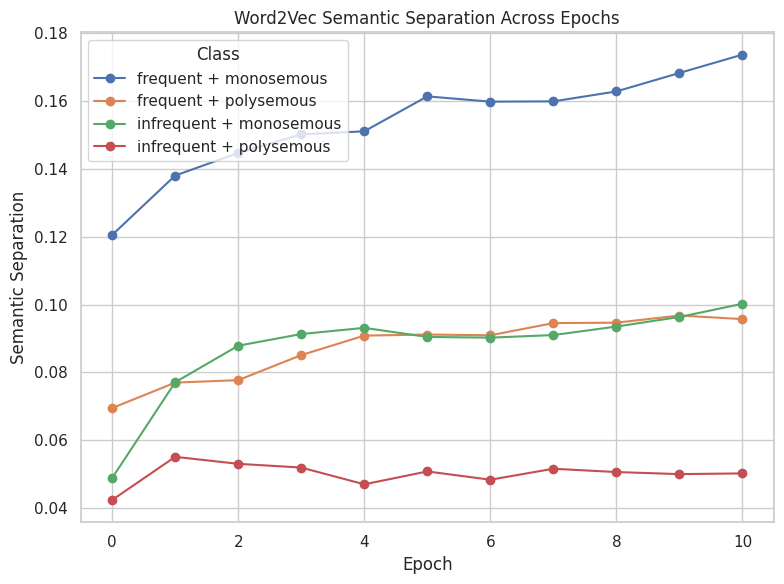

In [25]:
sem_sep_df['group'] = sem_sep_df['frequency_class'] + " + " + sem_sep_df['polysemy_class']
agg_df = sem_sep_df.groupby(['epoch', 'group']).agg({'semantic_separation': 'mean'}).reset_index()

plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
for grp in agg_df['group'].unique():
    subset = agg_df[agg_df['group'] == grp]
    plt.plot(subset['epoch'], subset['semantic_separation'], marker='o', label=grp)
plt.xlabel('Epoch')
plt.ylabel('Semantic Separation')
plt.title('Word2Vec Semantic Separation Across Epochs')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


In [26]:
def compute_neighborhood_density(w2v_model, dataset, top_k=10):
    """ Finds the top k-nn of each target word and computes the avg similarity of those neighbors
    Returns: a pd dataframe with the word, its frequency class, polysemy class and neighborhood density value"""
    helper = Word2VecHelper(w2v_model)
    results = []

    for entry in dataset["target_words"]:
        word = entry["word"]
        neighbors = helper.get_top_k_nn(word, k=top_k)

        if neighbors:
            sims = []
            for _, sim in neighbors:
                sims.append(sim)
            avg_density = np.mean(sims)
        else:
            avg_density = np.nan

        results.append({
            "word": word,
            "frequency_class": entry["frequency_class"],
            "polysemy_class": entry["polysemy_class"],
            "neighborhood_density": avg_density
        })
    return pd.DataFrame(results)

all_density = []
for epoch in range(eps):
    df = compute_neighborhood_density(w2v_models[epoch], mock_dataset)
    df["epoch"] = epoch
    all_density.append(df)

density_df = pd.concat(all_density, ignore_index=True)


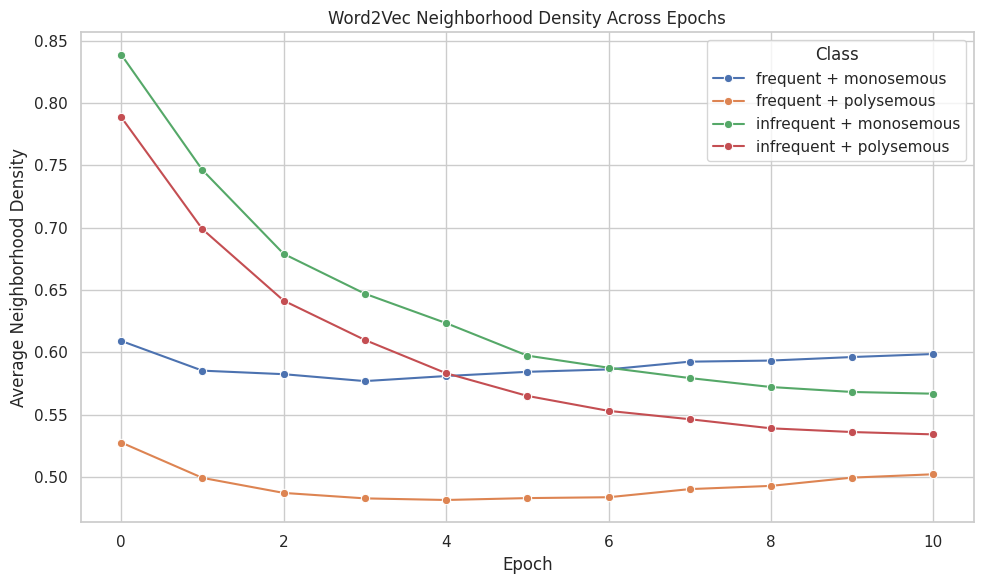

In [60]:
agg_density = density_df.groupby(['epoch', 'frequency_class', 'polysemy_class']).agg({'neighborhood_density':'mean'}).reset_index()
agg_density["condition"] = agg_density['frequency_class'] + " + " + agg_density['polysemy_class']

plt.figure(figsize=(10,6))
sns.lineplot(data=agg_density, x="epoch", y="neighborhood_density", hue="condition", marker="o")
plt.title("Word2Vec Neighborhood Density Across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Average Neighborhood Density")
plt.legend(title="Class")
plt.tight_layout()
plt.show()


In [29]:
def cosine_similarity_np(vec1, vec2):
    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot / (norm1 * norm2)

def compute_embedding_drift(model_a, model_b, target_words):
  """ Calculates how embeddings change between two consecutive epochs by subtracting the cosine similarity betewen two embeddings of the same word from 1.
  Returns: pd dataframe with the word, frequency class, polysemy class and drift magnitude. """
  helper_a = Word2VecHelper(model_a)
  helper_b = Word2VecHelper(model_b)
  rows = []

  for entry in target_words:
      word = entry["word"]
      emb1 = helper_a.get_embedding(word)
      emb2 = helper_b.get_embedding(word)

      if emb1 is None or emb2 is None:
          drift = np.nan
      else:
          sim = cosine_similarity_np(emb1, emb2)
          drift = 1 - sim

      rows.append({
          "word": word,
          "frequency_class": entry["frequency_class"],
          "polysemy_class": entry["polysemy_class"],
          "drift_magnitude": drift
      })

  return pd.DataFrame(rows)

all_drift = []

for i in range(eps-1):
    df = compute_embedding_drift(w2v_models[i], w2v_models[i+1], mock_dataset["target_words"])
    df["epoch_pair"] = str(i) + "-" + str(i+1)
    all_drift.append(df)

drift_df = pd.concat(all_drift, ignore_index=True)

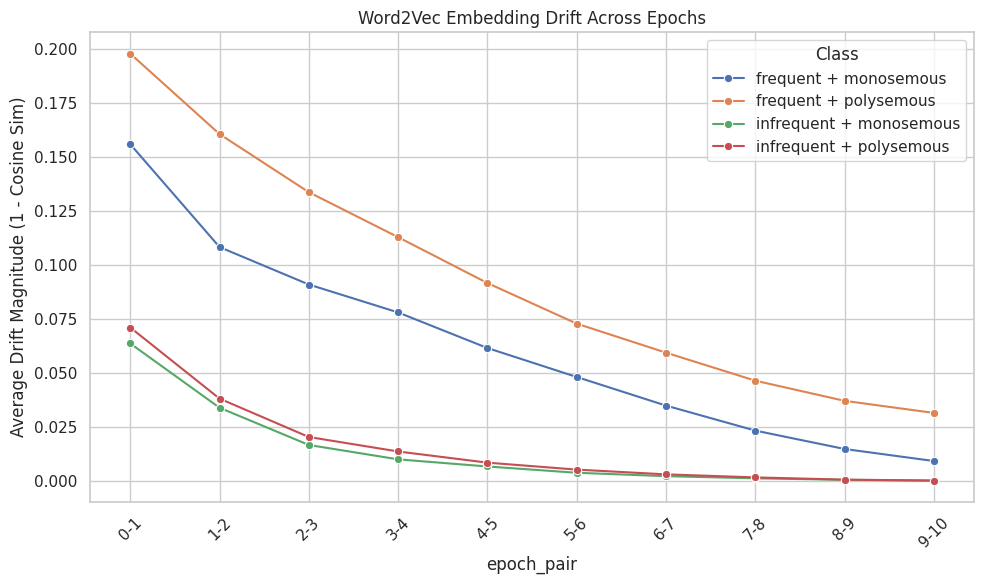

In [61]:
agg_drift = drift_df.groupby(['epoch_pair', 'frequency_class', 'polysemy_class'])['drift_magnitude'].mean().reset_index()
agg_drift["condition"] = agg_drift['frequency_class'] + " + " + agg_drift['polysemy_class']


plt.figure(figsize=(10,6))
sns.lineplot(data=agg_drift, x="epoch_pair", y="drift_magnitude", hue="condition", marker="o"
)
plt.xticks(rotation=45)
plt.ylabel("Average Drift Magnitude (1 - Cosine Sim)")
plt.title("Word2Vec Embedding Drift Across Epochs")
plt.legend(title="Class")
plt.tight_layout()
plt.show()


In [55]:
def compute_stability(model_a, model_b, target_words, k=10):
    helper_a = Word2VecHelper(model_a)
    helper_b = Word2VecHelper(model_b)
    rows = []

    for entry in target_words:
        word = entry["word"]

        try:
            nn1 = []
            for w, sim in helper_a.get_top_k_nn(word, k):
                nn1.append(w)

            nn2 = []
            for w, sim in helper_b.get_top_k_nn(word, k):
                nn2.append(w)

            both = set(nn1) & set(nn2)
            stability = len(both) / k
        except Exception:
            stability = np.nan

        rows.append({
            "word": word,
            "frequency_class": entry["frequency_class"],
            "polysemy_class": entry["polysemy_class"],
            "stability": stability
        })

    return pd.DataFrame(rows)


all_stability = []
for i in range(eps - 1):
    df = compute_stability(w2v_models[i], w2v_models[i + 1], mock_dataset["target_words"], k=10)
    df["epoch_pair"] = str(i) + "-" + str(i + 1)
    all_stability.append(df)

stability_df = pd.concat(all_stability, ignore_index=True)

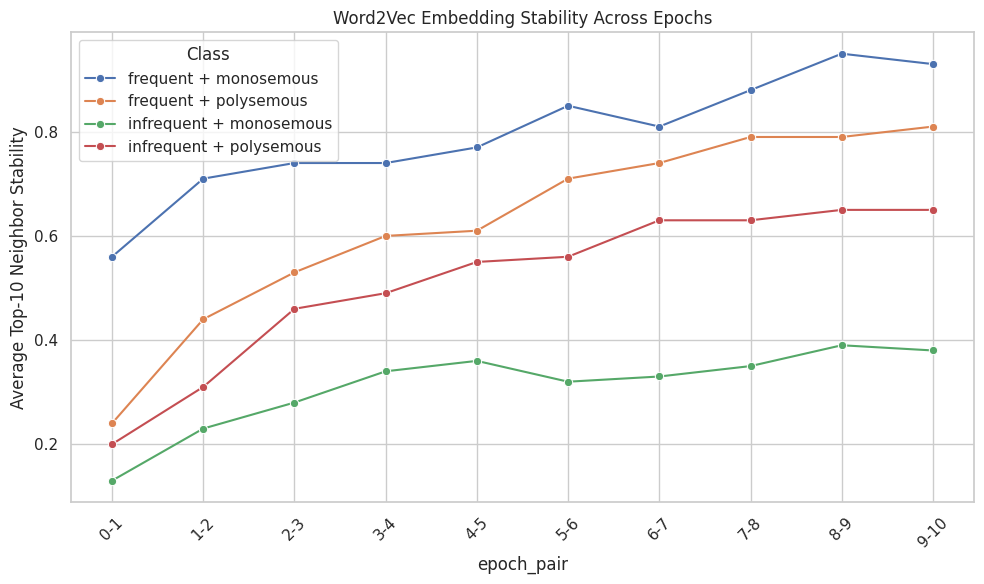

In [63]:
agg_stability = stability_df.groupby(['epoch_pair', 'frequency_class', 'polysemy_class']
)['stability'].mean().reset_index()

agg_stability["condition"] = agg_stability['frequency_class'] + " + " + agg_stability['polysemy_class']

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sns.lineplot(data=agg_stability, x="epoch_pair", y="stability",hue="condition",
    marker="o")

plt.xticks(rotation=45)
plt.ylabel("Average Top-10 Neighbor Stability")
plt.title("Word2Vec Embedding Stability Across Epochs")
plt.legend(title="Class")
plt.tight_layout()
plt.show()
